**Motivation.** 

**`Decision tree classifiers`** are attractive models if we care about interpretability. As the name decision tree suggests, we can think of this model as breaking down our data by making decision based on asking a series of questions.

**Opening example.** Let's consider the `tennis_playing` problem again!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
import io
import cv2
image = cv2.imread(r"C:\Users\Admin\Desktop\Nhan_pro\Data\illustration_tennis.jpg")

df = pd.read_excel(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\tennis_weather.xlsx",
                   usecols = ["DAY", "Temp", "Humidtity", "Play tennis?"], index_col = 'DAY')
df

,Temp,Humidtity,Play tennis?
DAY,,,
D1,Hot,High,No
D2,Hot,High,No
D3,Hot,High,Yes
D4,Mild,High,Yes
D5,Cool,Normal,Yes
D6,Cool,Normal,No
D7,Cool,Normal,Yes
D8,Mild,High,No
D9,Cool,Normal,Yes


During the **`Decision Tree's building`**, we must
- 1) `Select` a `feature` and `split` data into `binary tree`; 
- 2) `Continue splitting` with `available features`.

In the this example, 
- 1) We want to `predict` whether to `play tennis` based on the features: `"temperature"` and `"humidity"`
- 2) `Segment data` based on features to `predict result: "play tennis?"`
- 3) Trees that predict categorical results are `decision trees`

Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples. For examle:
- If `x_1 (Temp) < t_1 (Mild)`; we will decide `No playing tennis`.
- If `x_1 >= t_1`; we consider the `humidity`; 
- - If `x_2(Humdity) = High `, then `No tennis`
- - If not, then `play tennis`

Look at the illustration_image below!!

https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Tree_decision%20%26%20random%20forest/illustration_tennis.JPG

- The nodes which displayed the `output` (for instance `No Tennis / Play Tennis`) is called the `leaf_nodes` or `terminal node`!
- The nodes which displayed the `questions` (such as `Humidity := Normal`) is called the `non-leaf node`!
- The first question: `Temperature: >= Mild` is called the `root node`

The `non-leaf nodes` usually have two or more `child nodes`. These `child nodes` can be either a `leaf node` or another `non-leaf node`. 

`Child nodes` with the same parents are called `sibling nodes`. 

***`If all non-leaf nodes have only two child nodes, we say that it is a binary decision tree.`***

All the `questions` in the `binary decision` tree can be considered as `True or False`. A `Decision trees` for which a leaf node has multiple child nodes can also be taken as a binary decision tree. This is achievable because almost the questions can be asked in the form of `T/ F questions`.

In this file; we will discuss the `Decision tree classifiers` in 3 cases of variables:
- ***Case 1***: See **`Example 1`**, all the features are `categorical-data` (mostly focus on the categorical), using the dataset: `tennis-weather`.
- ***Case 2***: See **`Example 2`**, all the features are `continuous-data` (mostly focus on the range of value or the interval), using `iris dataset`.
- ***Case 3***: See **`Example 3`**, the features are `categorical` and `continuous`, using `titanic dataset`

There are couple of algorithms there to build a decision tree 
- 1) `ID3` (Iterative Dichotomiser 3). uses Entropy function and Information gain as metrics.
- 2) `CART`(or Classification and Regression Trees): uses `Gini` Index(Classification) as metric.

###  Algorithm.

To create a tree, we need to have a root node first and we know that nodes are features/attributes; such as outlook,temp,humidity and windy.

- 1) `Which one do we need to pick first`?? Determine the attribute that best classifies the training data; use this attribute at the root of the tree. Repeat this process at for each branch. This means we are performing top-down, greedy search through the space of possible decision trees.

- 2) `How do we choose the best attribute?` Use the attribute with the highest information gain in ID3
In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy that characterizes the (im)purity of an arbitrary collection of examples.

Hence, applying these metrics to the dataset to split the data (getting the `root node`); we have 4 steps.

- **1.compute the gini index for data-set**
- **2.for every attribute/feature:**
       i. `calculate gini index` for all categorical values
       ii. `take average information entropy` for the current attribute 
       iii. `calculate the gini gain`
- **3. pick the best gini gain attribute.**
- **4. Repeat until we get the tree we desired.**

**What is entropy**. Entropy, sometimes referred to as Shannon entropy. `It is a measure of the amount of uncertainty (an impurity measure) in the dataset` $S = \lbrace x_1, \ldots, x_n \rbrace$, denoted $H(S)$, defined by

$$ H(S) = - \sum_{i=1}^n p_i \log(p_i) $$

where $p_i = P(x = x_i) \in [0, 1]$ and noting that : 

$$\sum_{i=1}^n p_i = 1 \text{ and }  0 \log(0) = 0. $$

For example, in the binary classification problem (`n = 2`), we have
$$ H(S) = p \log p + (1 - p) \log (1- p), \quad \forall p \in [0, 1]. $$
- If all examples are positive or all are negative then entropy will be zero i.e, low.
- If half of the examples are of positive class and half are of negative class then entropy is one i.e, high.

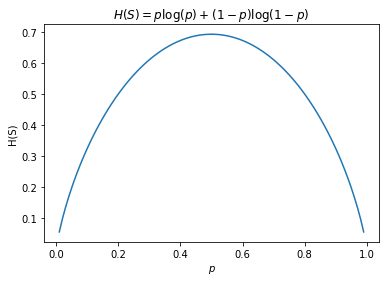

In [2]:
def shanon_entropy2(p):
    if (p == 0):
        H = 0
    else:
        H = -(p*np.log(p) + (1-p)*np.log(1-p))
    return H

t = np.linspace(0.01, 0.99, 100)
f = [shanon_entropy2(x) for x in t]
plt.plot(t, f)
plt.xlabel("$p$")
plt.ylabel("H(S)")
plt.title("$H(S) = p \log (p) + (1 - p) \log (1- p)$")
plt.show()

**What is `Information Gain (IG)`.**  A `IG` is the measure of the different entropy from before to after the set $S$ is split on an attribute/ feature $x$, that meant `how much uncertainly in` $S$ was reduced after spliting the set $S$ on $x$. Denoted $IG(x, S)$

In particularly, if
- There are $K-$ class $C_1, \ldots C_K$ and suppose that we are working on a `non-leaf node` with the `data-points` formed a set $S$ with $\vert S \vert = N$.
- For each $k$, the class $C_k$ has $N_k$ elements; and hence 
$$ N = \sum_{k=1}^K N_k \text{ and } p_k = P(x \in C_k) = \dfrac{N_k}{N} $$
and now then the entropy on $S$ became

$$ H(S) = - \sum_{k=1}^K \dfrac{N_k}{N} \log \left( \dfrac{N_k}{N} \right) $$

- Next, suppose that the `selected feature` be $x$, then the data-point on $S$ will be separated into $J$ `child node` $S_1, S_2, \ldots, S_J$ with $\vert S_{j} \vert = m_{j}$, we define

$$ H(x, S) = \sum_{j=1}^J \dfrac{m_j}{N} H(S_j) $$

Then,
$$ IG(A, S) = H(S) - H(s, S) $$

In `ID3 algorithm`, we choose $x$ such that
$$ x^{*} = \underset{x}{\text{argmax}} IG(x, S) = \underset{x}{\text{argmin}} H(x, S). $$

**What is gini index?** `Gini index or Gini impurity` can be understood as a criterion to minimize the probability of `misclassification`, denoted $I_G(x)$ and defined by
$$ I_G(S) = \sum_{i =1}^n p(i | S) \left( 1 - p(i| x) \right) = 1 - \sum_{i =1}^n p^2(i | S)$$

where $ p(i | S)$ is the proportion of the samples that belong to class $i$ for a particular `node` $S$. 

The Gini impurity is maximal if the classes are perfectly mixed. 

For example, in a binary class setting (`n = 2`) and suppose that the classes are distributed uniformly with $ p(i = 1 | S) =  p(i = 0 | S) = 0.5 $, then

$$ I_G(S) = 1 - \sum_{i=1}^2 0.5^2 = 0.5. $$

**Example 1.** Make a `decision tree` the predict on the whole dataset `tennis-weather`.

In [3]:
df = pd.read_excel(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\tennis_weather.xlsx", index_col = 'DAY')
df

,Temp,Humidtity,Outlook,Wind,Play tennis?
DAY,,,,,
D1,Hot,High,Sunny,Weak,No
D2,Hot,High,Sunny,Strong,No
D3,Hot,High,Overcast,Weak,Yes
D4,Mild,High,Rain,Weak,Yes
D5,Cool,Normal,Rain,Weak,Yes
D6,Cool,Normal,Rain,Strong,No
D7,Cool,Normal,Overcast,Strong,Yes
D8,Mild,High,Sunny,Weak,No
D9,Cool,Normal,Sunny,Weak,Yes


In [4]:
X = pd.get_dummies(df[['Outlook', 'Temp', 'Humidtity', 'Wind']])
y = pd.DataFrame(df['Play tennis?'])
X

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temp_Cool,Temp_Hot,Temp_Mild,Humidtity_High,Humidtity_Normal,Wind_Strong,Wind_Weak
DAY,,,,,,,,,,
D1,0,0,1,0,1,0,1,0,0,1
D2,0,0,1,0,1,0,1,0,1,0
D3,1,0,0,0,1,0,1,0,0,1
D4,0,1,0,0,0,1,1,0,0,1
D5,0,1,0,1,0,0,0,1,0,1
D6,0,1,0,1,0,0,0,1,1,0
D7,1,0,0,1,0,0,0,1,1,0
D8,0,0,1,0,0,1,1,0,0,1
D9,0,0,1,1,0,0,0,1,0,1


In [5]:
df.columns

Index(['Temp', 'Humidtity', 'Outlook', 'Wind', 'Play tennis?'], dtype='object')

In [6]:
tree = DecisionTreeClassifier(criterion = 'gini', 
                              max_depth = 4, 
                              random_state = 1) 
tree.fit(X, y)
tree.predict(X)

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y, tree.predict(X))

1.0

Now, we will see the `diagram`

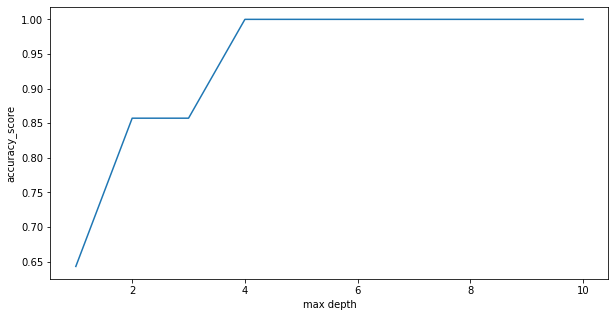

In [8]:
accs = []

for max_depth in range(1, 11):  
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X, y)
    accs.append(accuracy_score(y, clf.predict(X)))

plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), accs)
plt.xlabel('max depth')
plt.ylabel("accuracy_score")
plt.show()

To get the diagram in the link below: https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Tree_decision%20%26%20random%20forest/dtree_tennis.png

we can run the following code

In [9]:
#pip install graphviz
#!pip install pydotplus
import graphviz
from pydotplus import graph_from_dot_data 
from sklearn.tree import export_graphviz 

clf = DecisionTreeClassifier(max_depth=4,  criterion = 'gini', min_samples_split= 2)
clf.fit(X, y)
dot_data = export_graphviz(clf,  filled=True, 
                  rounded=True, 
                  feature_names = list(X.columns), class_names = ["No", "Yes"])

graph = graph_from_dot_data(dot_data) 
# graph.write_png('dtree_tennis.png') 
graph

Now, we will explain step_by_step the detail of this algorithm for the preceding `decision tree`!!

Look at the `Play tennis` in this example; we have `5` times the `respone = "No"` and `9` for `"Yes"`. The `entropy` and the `gini index` at this `root node` $S$ are calculated by
$$ H(S) = -\dfrac{5}{14} \log \left( \dfrac{5}{14} \right) - \dfrac{9}{14} \log \left( \dfrac{9}{14} \right) \approx 0.65 $$
and
$$ I_G(S) = \dfrac{5}{14} \left( 1 - \dfrac{5}{14} \right) + \dfrac{9}{14} \left( 1 - \dfrac{9}{14} \right) \approx 0.4592 $$ 

Therefore, the `root node` must be `out look`. Indeed, based on the maximizing of the `information gain` $IG(x, S)$ (also the minimizing of $H(x, S)$) where $x$ can be `outlook, temperature, humidity` and `windy`. Indeed

- For $x =$ `outlook`, there are 3 `child nodes`; denoted by  $S_{\text{sunny}}, S_{\text{overcast}}, S_{\text{rainy}}$. Look at the tables in the link below.
https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Tree_decision%20%26%20random%20forest/tab.JPG , then

$$ H(S_{\text{sunny}}) = H(S_{\text{rainy}}) = -\dfrac{2}{5} \log \left( \frac{2}{5} \right) -\dfrac{3}{5} \log \left( \frac{3}{5} \right) \approx 0.673, \text{ and } H(S_{\text{overcast}}) = 0, $$

so,
$$ \begin{array}{ccl} H\left( x = \text{outlook}, S \right) &=& \dfrac{\vert S_{\text{sunny}} \vert}{N} H\left( S_{\text{sunny}} \right) + \dfrac{\vert S_{\text{rainy}} \vert}{N} H\left( S_{\text{rainy}} \right) + \dfrac{\vert S_{\text{overcast}} \vert}{N} H\left( S_{\text{overcast}} \right) \\ & = & \dfrac{5}{14} H\left( S_{\text{sunny}} \right) + \dfrac{5}{14} H\left( S_{\text{rainy}} \right) + \dfrac{4}{14} H\left( S_{\text{overcast}} \right) \approx 0.48. \end{array} $$

In [10]:
## verify the entropy values above

shanon_entropy2(5/14), shanon_entropy2(2/5)

(0.6517565611726532, 0.6730116670092565)

- For $x =$ `temperature`, there are 3 `child nodes`; denoted by  $S_{\text{hot}}, S_{\text{mild}}, S_{\text{cool}}$; do the same thing and we obtain

$$ \begin{array}{ccl} H\left( x = \text{temperature}, S \right) &=& \dfrac{\vert S_{\text{hot}} \vert}{N} H\left( S_{\text{hot}} \right) + \dfrac{\vert S_{\text{mild}} \vert}{N} H\left( S_{\text{mild}} \right) + \dfrac{\vert S_{\text{cool}} \vert}{N} H\left( S_{\text{cool}} \right) \\ & \approx & \dfrac{4}{14} \times 0.693 + \dfrac{6}{14} \times 0.637 + \dfrac{4}{14} \times 0.562 \approx 0.631. \end{array} $$ 

- Likewise, we obtain
$$ H\left( x = \text{humidity}, S \right) \approx 0.547  ,\text{ and } H\left( x = \text{windy}, S \right) \approx 0.618 $$

So 

$$ \text{outlook} = \underset{x}{\text{argmin}} H(x, S)$$

the `root node` $x^{*}$ here must be `outlook` ($H(x, S) \approx 0.48$).

In [11]:
## Define the gini index for the binary classification

def gini(p): 
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

We had started with 14 samples at the root and split them into two child nodes with `5("No")` and `9("Yes")` samples, the `gini_index` is about `0.459`. At the `root node` we using the **`outlook_overcast <= 0.5`** (`binary` feature since we used **`pd.get_dummies`**, all features of our dataset become the `binary-feature`) or $x^{*} = $ { `outlook = "overcast"`} (contains only the class `"Yes"`)

After the `first split`, repeat the same thing for sub-trees, we will obtain the next `node` be `humidity` and we can see that :
- In the `right child node : outlook == "overcast"` is only contains samples from the `play = "Yes"` class and the `Gini Impurity` 
$$ I_G = \dfrac{0}{4} \left( 1 - \dfrac{0}{4} \right) + \dfrac{4}{4} \left( 1 - \dfrac{4}{4} \right) = 0.$$

- In the `left child note` (that is `outlook != "overcast"`), there are 10 samples and observe that
$$ P\left( \text{"high" & "not overcast"} \vert \text{"No"}  \right) = \frac{4}{5} = 0.8,  $$
$$ P\left( \text{"normal" & "not overcast"} \vert \text{"No"}  \right) = \frac{1}{5} = 0.2  $$

Since there are `5` observations in `Humidity = "High"` at this `node` then the `gini index` be
$$ I_G = \dfrac{5}{10} \left( 1 - \dfrac{5}{10} \right) + \dfrac{5}{10} \left( 1 - \dfrac{5}{10} \right) = 0.5. $$
in this case! 

- By the similar calculation; we obtain the rest of the `decision tree.`

In [12]:
## Verify the gini-indexes above

gini(0), gini(5/10)

(0, 0.5)

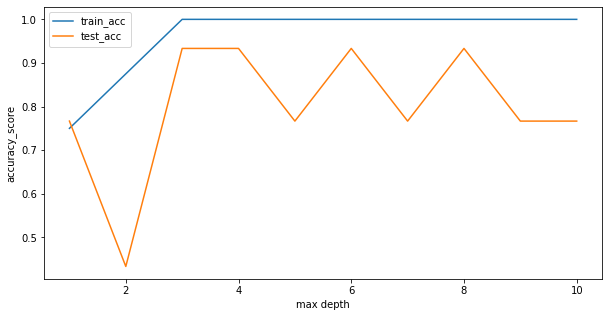

In [13]:
train_accs = []
test_accs = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 6)

for max_depth in range(1, 11):  
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), train_accs, label = 'train_acc')
plt.plot(range(1, 11), test_accs, label = 'test_acc')
plt.legend()
plt.xlabel('max depth')
plt.ylabel("accuracy_score")
plt.show()

Although the preceding figure (for `tennis_weather.csv`) illustrates the concept of a decision tree based on categorical variables, the same concept applies if our features are real numbers, like in the Iris dataset. 

**Example 2.** We could simply define a `cut-off` value along the sepal width feature axis and ask a binary question.

In [14]:
from sklearn.datasets import *

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [15]:
clf = DecisionTreeClassifier(max_depth = 10,  criterion = 'gini', 
                             min_samples_split= 2)

clf.fit(cancer.data, cancer.target)

dot_data = export_graphviz(clf,  filled=True, 
                  rounded=True, 
                  feature_names = cancer.feature_names, class_names = ["malignant", "benign"])


graph = graph_from_dot_data(dot_data) 
# graph.write_png('dtree_cancer.png') 
graph

https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Tree_decision%20%26%20random%20forest/dtree_cancer.png

By considering the maximizing value of `information gain` or minimizing value of $H(x, S)$ again, (similar to the explaination "*why choosing* `outlook` *be the* `root node`" in **Example 1**); we also get the `root node` now be `worst-radius` in this example. 

Again by calculation the `gini_index` then looking at the `decision tree` figure, we can now nicely trace back the splits that the decision tree determined from our dataset. For instance, we have `212` samples of `benign` and `317` case of `malignant` so the `gini-index` is about `0.468`

Next, we started with `569` samples at the root and split them into `2 child nodes` with `190` and `379` samples, using the `worst-radius cut-off ≤ 16.795`. Hence, after the first split
- The `gini-index` at the `right child node` is about `0.109` because there are `179` observations (the totall be `190`) has the `mean_texture ≤ 16.11`
- Likewise, in the `left child node`, there are `33` observations (of `379`) has `worst concave point ≤ 0.136` leads the `gini index` is about `0.159`. 

Do the same thing until the `depth = 10`.

In [16]:
## Check the gini index again!

gini(212/569), gini(179/190), gini(33/379)

(0.4675300607546925, 0.10908587257617722, 0.1589796785040483)

In the example1; the sample_size = 14; it is not enough to reflect a `testing_accuaracy` is good or not! But in this example; we will take a look to study the `testing_acccuarcy` and this model can be make `overfiting or not`?

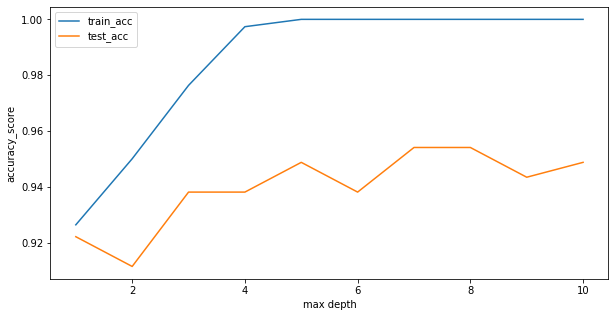

In [17]:
train_accs = []
test_accs = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2)

for max_depth in range(1, 11):  
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)) )

plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), train_accs, label = 'train_acc')
plt.plot(range(1, 11), test_accs, label = 'test_acc')
plt.legend()
plt.xlabel('max depth')
plt.ylabel("accuracy_score")
plt.show()

**Example 3.**

In [18]:
import seaborn as sns
ttn = sns.load_dataset("titanic")
ttn = ttn.dropna()
ttn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


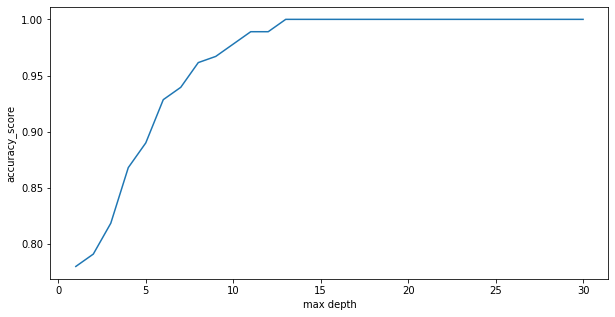

In [19]:
X = pd.get_dummies(ttn[['sex', 'embarked', 'who', 'adult_male', 'embark_town', 'alone']])
X['pclass'] = ttn['pclass']
X['fare'] = ttn['fare']
X['age'] = ttn['age']
X['parch'] = ttn['parch']
X.shape
y = pd.DataFrame(ttn["alive"])

accs = []

for max_depth in range(1, 31):  
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X, y)
    accs.append(accuracy_score(y, clf.predict(X)))

plt.figure(figsize = (10, 5))
plt.plot(range(1, 31), accs)
plt.xlabel('max depth')
plt.ylabel("accuracy_score")
plt.show()

In [20]:
from pydotplus import graph_from_dot_data 
from sklearn.tree import export_graphviz 

clf = DecisionTreeClassifier(max_depth=15,  criterion = 'gini', min_samples_split= 2)
clf.fit(X, y)
dot_data = export_graphviz(clf,  filled=True, 
                  rounded=True, 
                  feature_names = list(X.columns), class_names = ["No", "Yes"])

graph = graph_from_dot_data(dot_data) 
#graph.write_png('dtree_titanic.png') 

- For `max_depth = 10`: https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Tree_decision%20%26%20random%20forest/dtree_titanic.png

- For `max_depth = 14`: https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Tree_decision%20%26%20random%20forest/dtree_titanic_depth%3D14.png

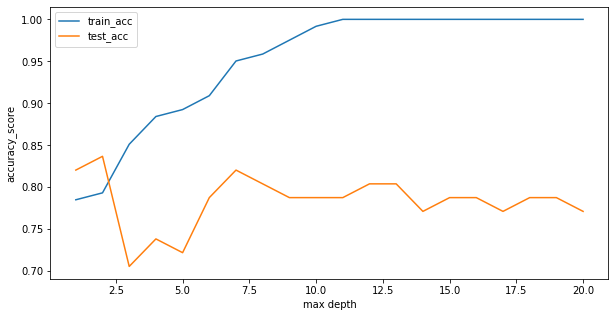

In [21]:
train_accs = []
test_accs = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12)

for max_depth in range(1, 21):  
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize = (10, 5))
plt.plot(range(1, 21), train_accs, label = 'train_acc')
plt.plot(range(1, 21), test_accs, label = 'test_acc')
plt.legend()
plt.xlabel('max depth')
plt.ylabel("accuracy_score")
plt.show()